In [237]:
import matplotlib.pyplot as plt
import numpy as np
import meshio                       

from datetime import datetime
import solidspy.preprocesor as pre
import solidspy.assemutil as ass    
import solidspy.solutil as sol      
import solidspy.postprocesor as pos 
import aux_functions as aux                                            
from solidspy import solids_GUI

In [238]:
def reading():
    """ Lee los documentos .txt 
    
    Returns
    -------
    nodes : ndarray, float
        Nodes of mesh.
    mats : ndarray, float
        Material properties.
    elements : ndarray, float
        Elements of the mesh
    loads : ndarray, float
        Loads on the model.
    """
    
    nodes    = np.loadtxt('files/beam/' + "nodes.txt", ndmin=2)
    mats     = np.loadtxt('files/beam/' + "mater.txt", ndmin=2)
    elements = np.loadtxt('files/beam/' + "eles.txt", ndmin=2, dtype=int)
    loads    = np.loadtxt('files/beam/' + "loads.txt", ndmin=2)

    return nodes, mats, elements, loads

Number of nodes: 4
Number of elements: 1
Number of equations: 4
Duration for system solution: 0:00:00.003419
Duration for post processing: 0:00:00.440355
Analysis terminated successfully!


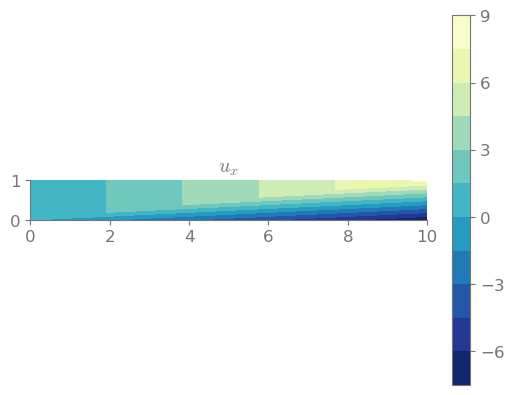

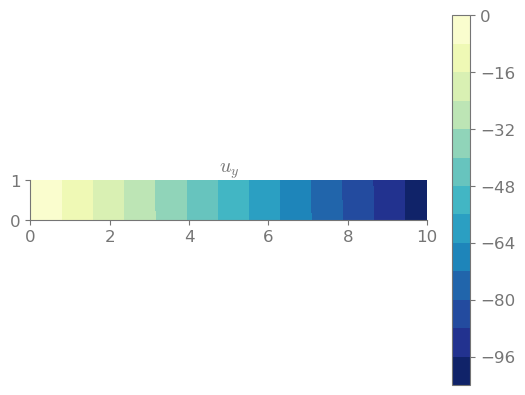

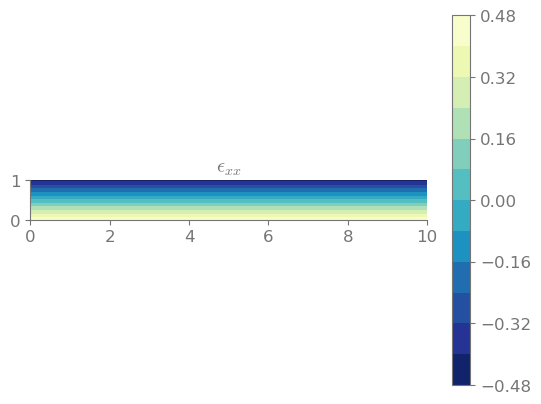

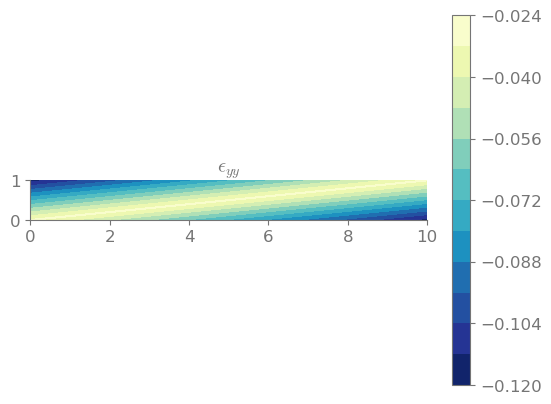

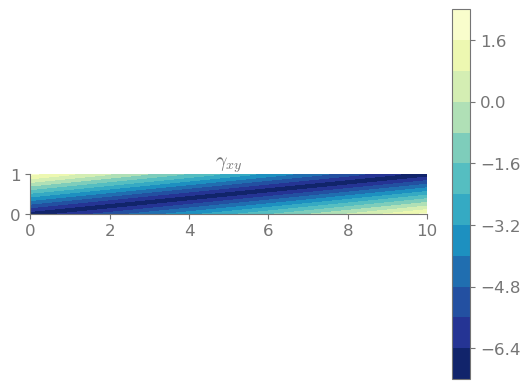

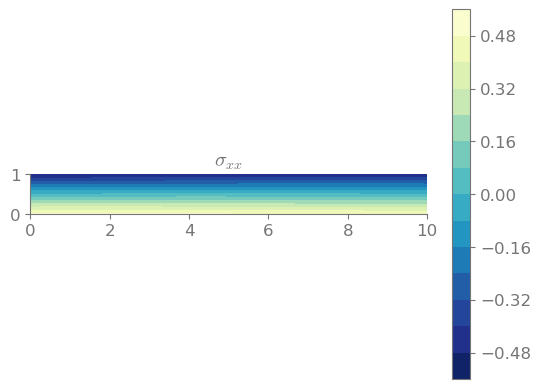

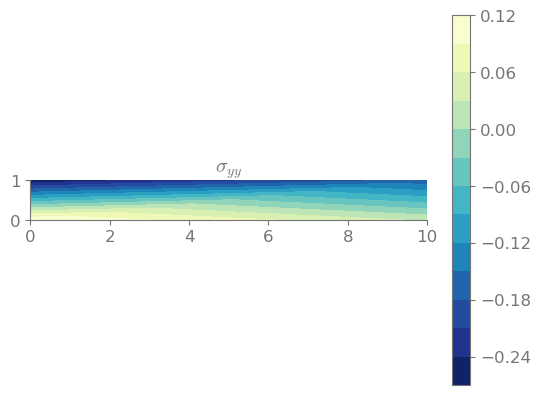

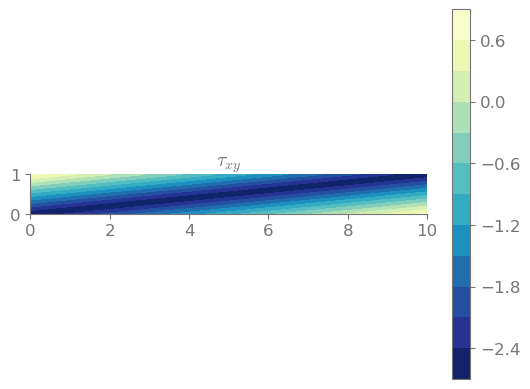

In [239]:
disp, strains, stresses = solids_GUI(True, True, './files/beam/')

In [240]:
nodes, mats, elements, loads = reading() 
ensamblador, restricciones, neq = ass.DME(nodes, elements)
mat_rigidez = ass.assembler(elements, mats, nodes, neq, ensamblador)
body = False

if body== True:
    force_vec = ass.loadasem(loads, restricciones, neq) + aux.body_forces(elements, nodes, neq, ensamblador , force_y=aux.force_y )   
else:
    force_vec = ass.loadasem(loads, restricciones, neq)

UG = sol.static_sol(mat_rigidez, force_vec)
UC = pos.complete_disp(restricciones, nodes, UG)
print(UC)

[[   0.            0.        ]
 [  -7.36396813 -101.7602116 ]
 [   7.80269854 -101.90645507]
 [   0.            0.        ]]


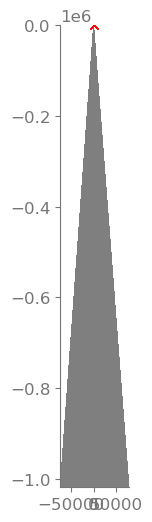

In [241]:
aux.deformacionFill(nodes , elements , UC , factor = 1.0e4, cmap='cividis')

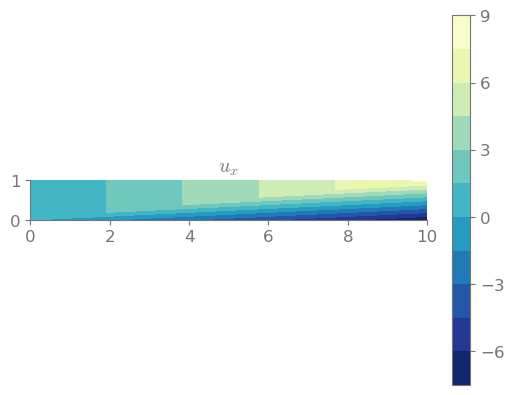

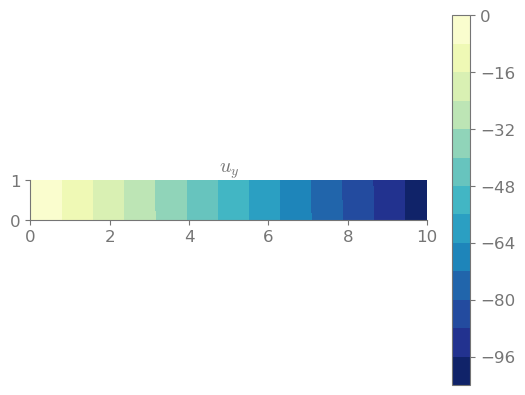

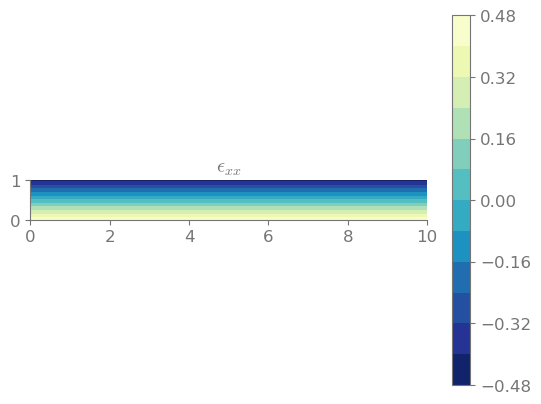

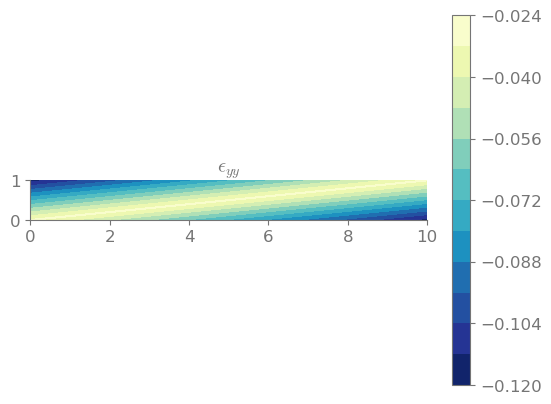

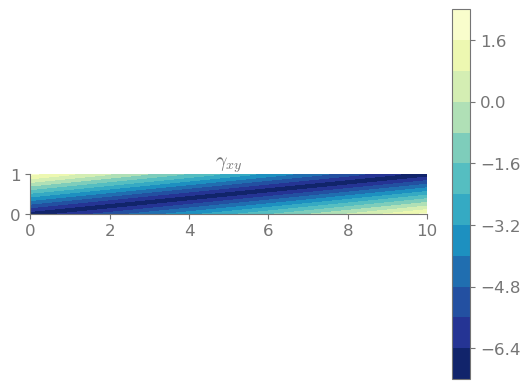

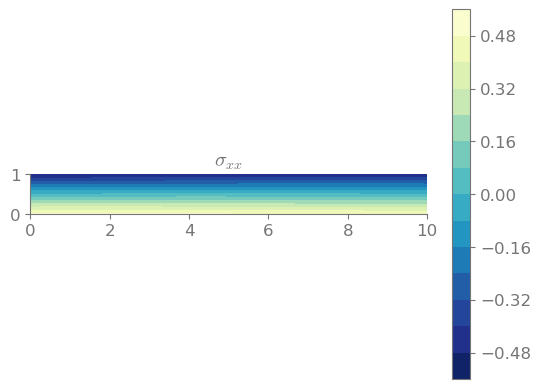

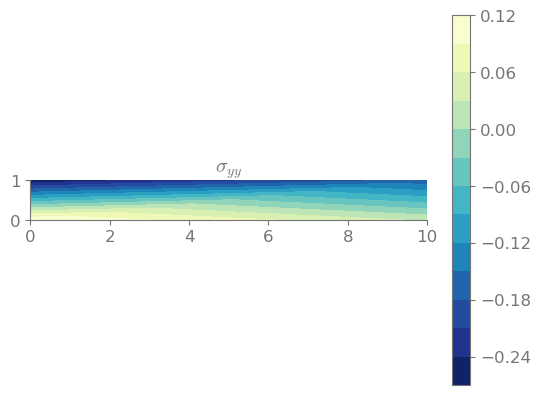

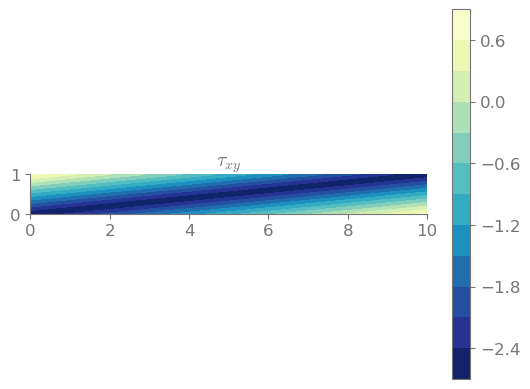

In [242]:
E_nodes, S_nodes = pos.strain_nodes(nodes, elements, mats, UC)
pos.fields_plot(elements, nodes, UC, E_nodes=E_nodes , S_nodes=S_nodes)

In [243]:
L = 1
H = 1
F = -10
nx = 20
ny = 20
x, y, els = pre.rect_grid(L, H, nx, ny)
nodes = np.zeros(((nx + 1)*(ny + 1), 5))
nodes[:, 0] = range((nx + 1)*(ny + 1))
nodes[:, 1] = x
nodes[:, 2] = y
nodes[x==L/2, 3] = -1
nodes[nx*(ny//2 + 1) - 1, 4] = -1    
loads = np.zeros((ny + 1, 3))
loads[:, 0] = nodes[x==-L/2, 0]
loads[:, 2] = F
np.savetxt("files2/eles.txt", els, fmt="%d")
np.savetxt("files2/nodes.txt", nodes, fmt=("%d", "%.4f", "%.4f", "%d", "%d"))
np.savetxt("files2/loads.txt", loads, fmt=("%d", "%.3g", "%.3g"))

Number of nodes: 441
Number of elements: 400
Number of equations: 860
Duration for system solution: 0:00:00.338020
Duration for post processing: 0:00:00.760436
Analysis terminated successfully!


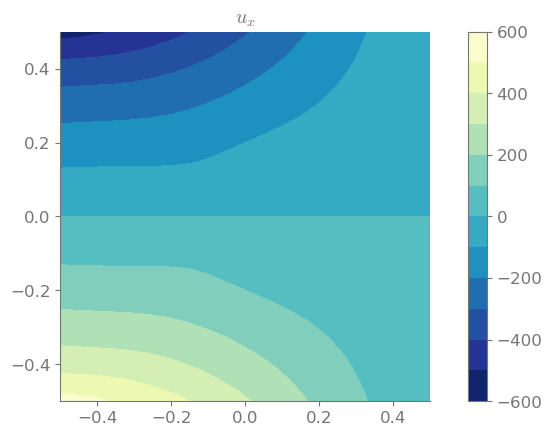

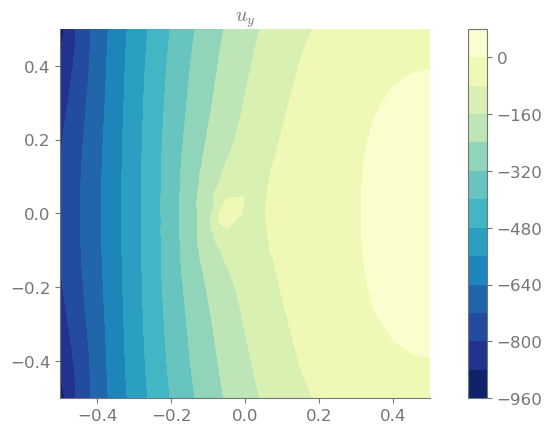

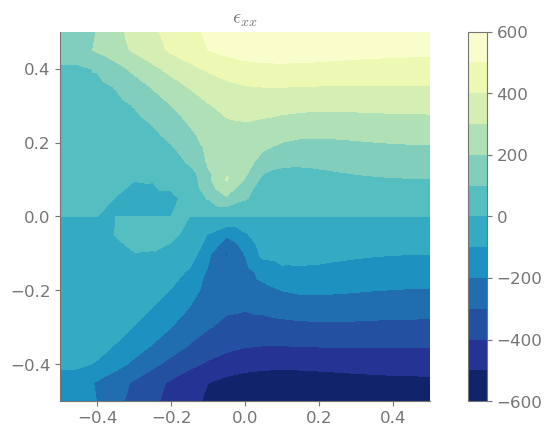

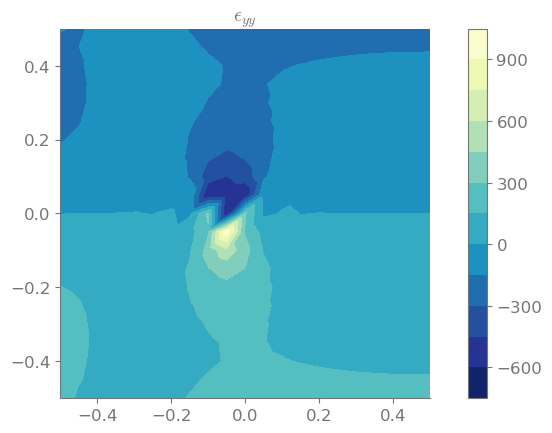

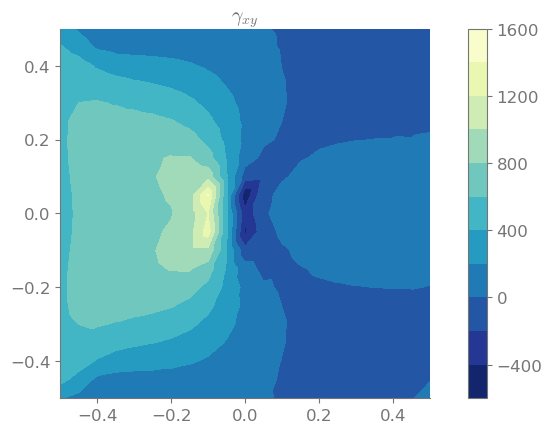

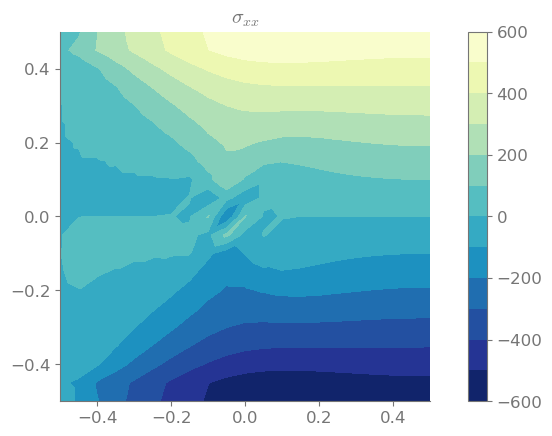

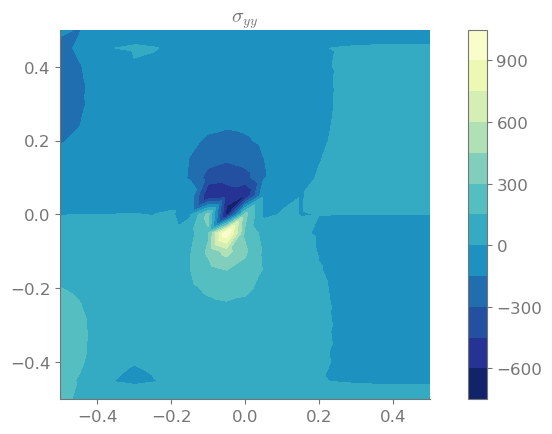

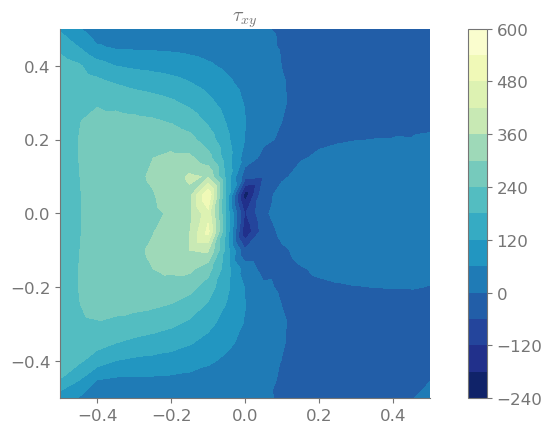

In [244]:
disp, strains, stresses = solids_GUI(True, True, './files2/')